In [7]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<Axes: xlabel='table'>

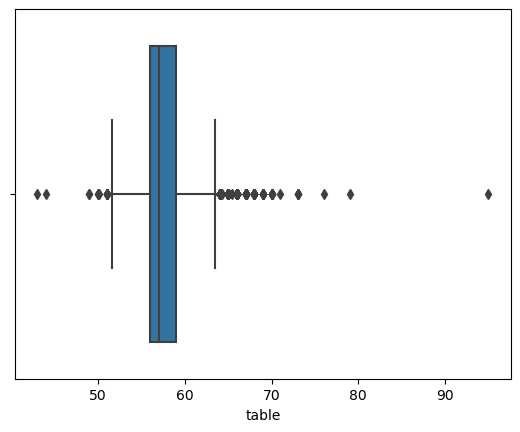

In [9]:
sns.boxplot(x=df_table)

In [13]:
Q1= df_table.quantile(0.25)

In [14]:
Q3 = df_table.quantile(0.75)

In [15]:
IQR = Q3 - Q1

In [16]:
print(IQR,Q1,Q3)

3.0 56.0 59.0


In [17]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
lower_bound, upper_bound

(51.5, 63.5)

In [18]:
(df_table<lower_bound)|(df_table>upper_bound)


0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [19]:
outliers = (df_table<lower_bound)|(df_table>upper_bound) #outlier values

In [20]:
df_table[outliers] #outlier values

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [21]:
df_table[outliers].index

Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,   359,
       ...
       53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757, 53785],
      dtype='int64', length=605)

# AYKIRI DEGER PROBLEMI COZME


 ## SILME
 

In [1]:
import pandas as pd 

In [22]:
type(df_table)

pandas.core.series.Series

In [23]:
df_table = pd.DataFrame(df_table)

In [24]:
df_table.shape

(53940, 1)

In [26]:
clear_output = df_table[~((df_table<lower_bound)|(df_table>upper_bound)).any(axis=1)]
clear_output

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [27]:
clear_output.shape 

(53335, 1)

# Ortlama ile doldurma


In [30]:
outliers.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [31]:
df_table.mean()

table    57.457184
dtype: float64

In [32]:
df_table[outliers]

,table
2,65.0
91,69.0
145,64.0
219,64.0
227,67.0
...,...
53695,65.0
53697,65.0
53756,64.0
53757,64.0


In [33]:
df_table[outliers] = df_table.mean()

In [34]:
df_table[outliers]

,table
2,57.457184
91,57.457184
145,57.457184
219,57.457184
227,57.457184
...,...
53695,57.457184
53697,57.457184
53756,57.457184
53757,57.457184


# Baskılama
 

In [64]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()
df_table = df["table"]

In [65]:
df_table[outliers]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [66]:
lower_bound,upper_bound



(51.5, 63.5)

In [69]:
df_table = pd.DataFrame(df_table)

In [71]:
df_table[df_table>upper_bound] = upper_bound
df_table[df_table<lower_bound] = lower_bound    

In [72]:
df_table[outliers]

,table
2,63.5
91,63.5
145,63.5
219,63.5
227,63.5
...,...
53695,63.5
53697,63.5
53756,63.5
53757,63.5


In [75]:
df_table

,table
0,55.0
1,61.0
2,63.5
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


## Çok Değişkenli Aykırı Gözlem Analizi

### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [80]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


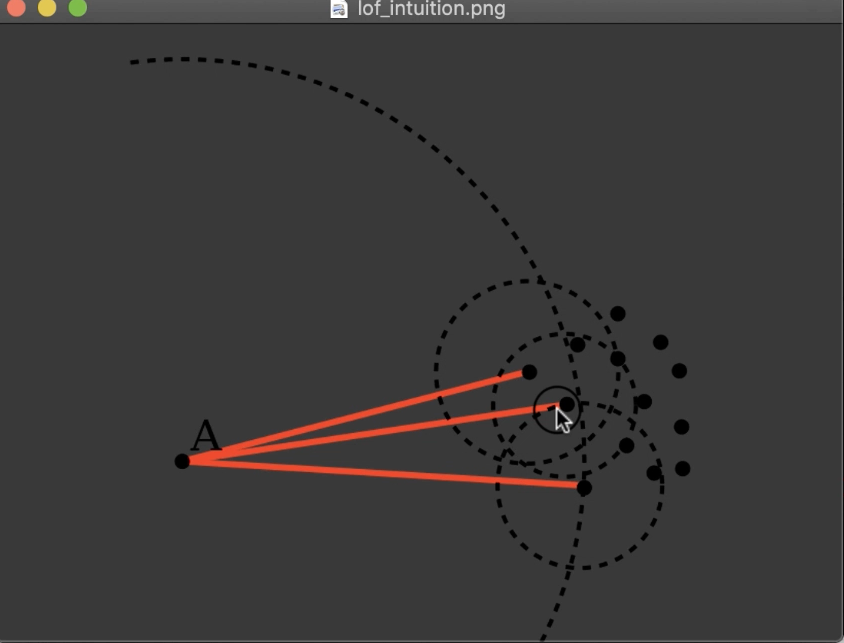

In [81]:
import numpy as np

In [83]:
from sklearn.neighbors import LocalOutlierFactor

In [84]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [85]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [86]:
df_scores = clf.negative_outlier_factor_

In [96]:
np.sort(df_scores)[0:30]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375,
       -3.45066056, -3.42193513, -3.40044967, -3.36779427, -3.35007989,
       -3.32557427, -3.29322345, -3.22070216, -3.19253942, -3.17216736])

In [100]:
import pandas as pd

<Axes: >

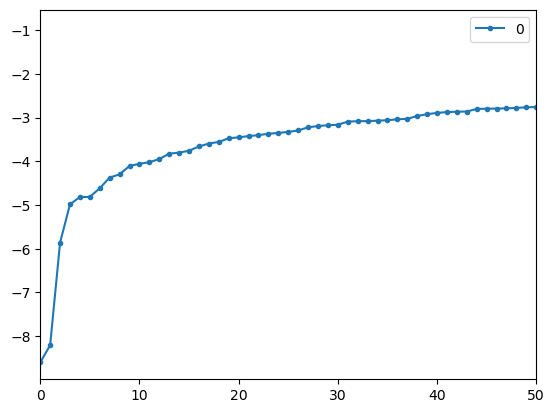

In [101]:
pd.DataFrame(np.sort(df_scores)).plot(stacked=True, xlim=[0,50], style='.-')

In [104]:
np.sort(df_scores)[2]

-5.860843552735125

In [105]:
threshold_value =  np.sort(df_scores)[2]
threshold_value # En iyi sıcrama yapılan degeri alıyoruz.

-5.860843552735125

In [106]:
outlier = df_scores > threshold_value
outlier

array([ True,  True,  True, ...,  True,  True,  True])

In [110]:
clear_df = df[df_scores > threshold_value] # aykırı olmayan değerleri alıyoruz.

In [111]:
clear_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [112]:
outlier_df = df[df_scores < threshold_value] # aykırı olan değerleri alıyoruz.

In [113]:
outlier_df

,carat,depth,table,price,x,y,z
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


 # Baskılama
 

In [114]:
df[df_scores == threshold_value] # sınırda olan değerleri alıyoruz. 

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42


In [115]:
pressure_value = df[df_scores == threshold_value]  # baskı degeri olarak atadik.

In [119]:
 outlier_df # Aykiri degelerler.
 

,carat,depth,table,price,x,y,z
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [120]:
outlier_df.to_records(index = False) # Aykiri degerleri array olarak aliyoruz.Index'siz halde.

rec.array([(0.51, 61.8, 54.7, 1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. , 2075, 5.15, 31.8 ,  5.12)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [122]:
res  = outlier_df.to_records(index = False) 

In [127]:
pressure_value.to_records(index = False) # Baskı degeri olarak atadigimiz degeri array olarak aliyoruz.Index'siz halde.

rec.array([(1.03, 78.2, 54., 1262, 5.72, 5.59, 4.42)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [126]:
res[:] = pressure_value.to_records(index = False) # Aykiri degerleri baski degeri ile degistiriyoruz.
res

rec.array([(1.03, 78.2, 54., 1262, 5.72, 5.59, 4.42),
           (1.03, 78.2, 54., 1262, 5.72, 5.59, 4.42)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [128]:
outlier_df # Ana dataframe icerisinde yapı hala daha degismedi, degistimek gerekli.


,carat,depth,table,price,x,y,z
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [129]:
import pandas as pd

In [136]:
outlier_df= pd.DataFrame(res, index = outlier_df.index) # Aykiri olmayan degerleri baski degeri ile degistiriyoruz.

In [138]:
outlier_df # Aykiri degerler baski degeri ile degistirildi.

,carat,depth,table,price,x,y,z
48410,1.03,78.2,54.0,1262,5.72,5.59,4.42
49189,1.03,78.2,54.0,1262,5.72,5.59,4.42
